<a href="https://colab.research.google.com/github/realnsa/data-science-application-college-task/blob/main/ADS_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import kagglehub

# **Load Dataset**

In [3]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

csv_file_path = f'{path}/insurance.csv'

In [4]:
df = pd.read_csv(csv_file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Preprocessing(Penangana Missing Value dan Duplikasi Data**

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## **Exploratory Data Analysis (EDA)**


In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


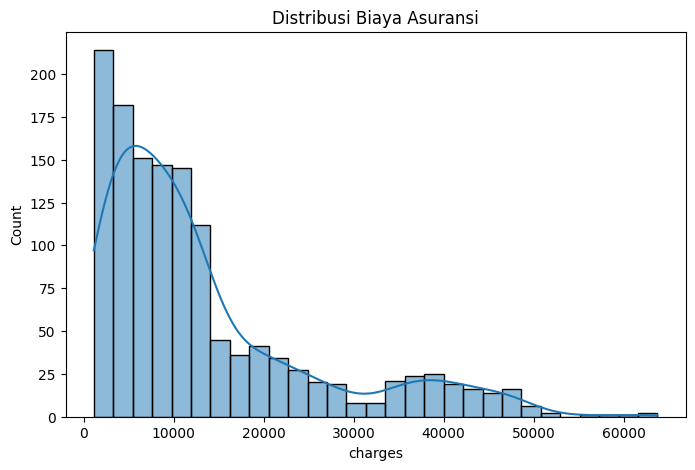

In [11]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribusi Biaya Asuransi')
plt.show()

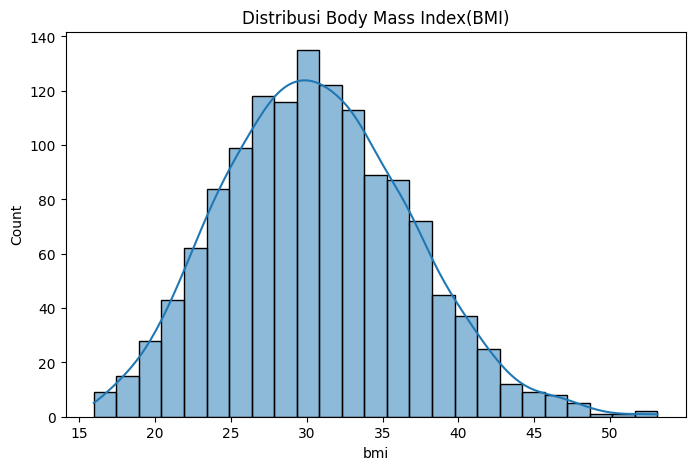

In [12]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribusi Body Mass Index(BMI)')
plt.show()

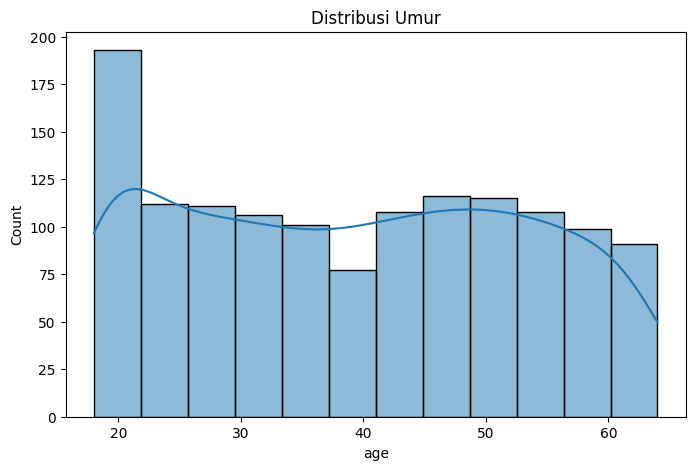

In [13]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Umur')
plt.show()

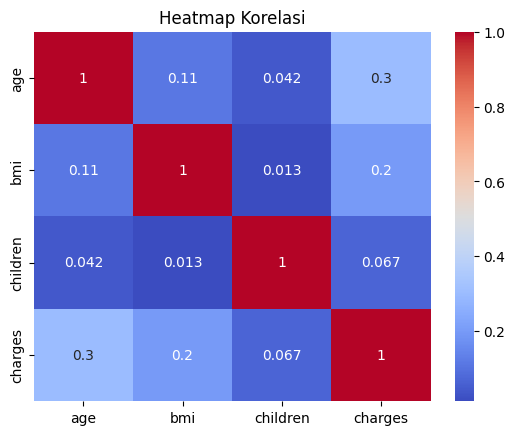

In [14]:
# Korelasi numerik
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

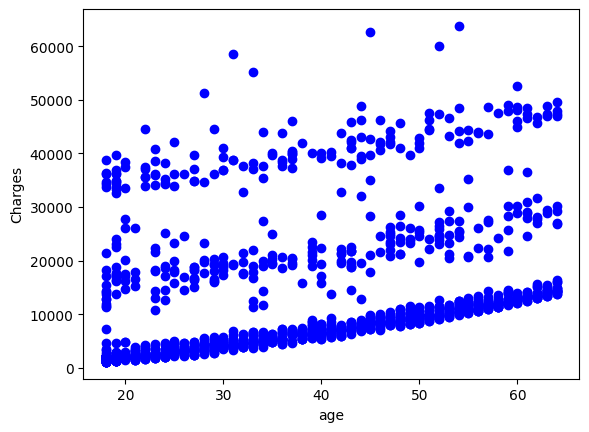

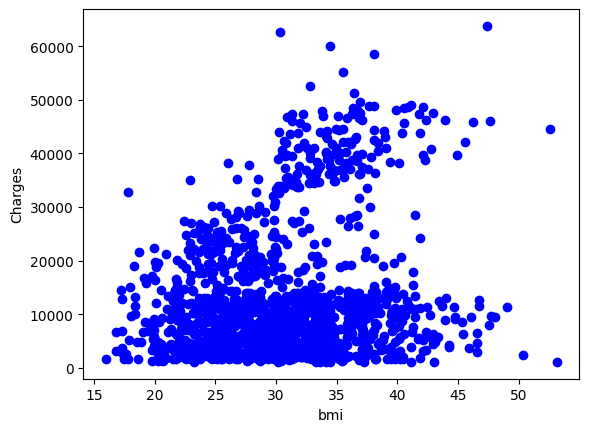

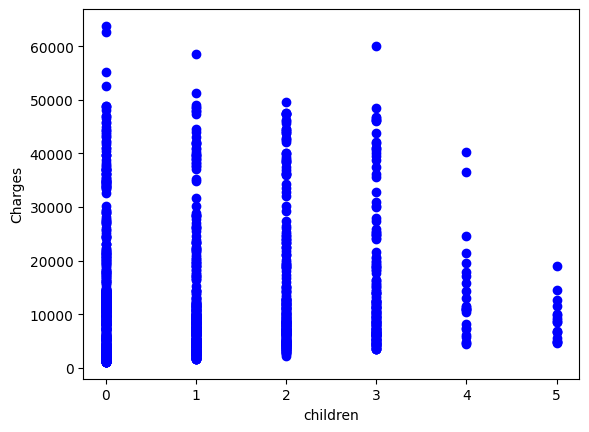

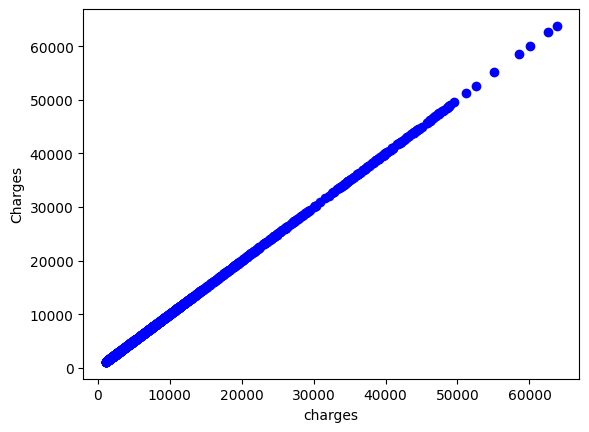

In [26]:
numerical_col = [i for i in df.select_dtypes(include='number').columns]
cdf = df[numerical_col]
for i in numerical_col:
  plt.scatter(cdf[i], cdf['charges'], color='blue')
  plt.xlabel(i)
  plt.ylabel("Charges")
  plt.show()

## **Preprocessing(Persiapan untuk model Regresi)**

In [16]:
# Langkah 5: Encoding variabel kategorik
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'region'],
    drop_first=True  # Mengurangi dimensi dengan menghilangkan kolom pertama
) # BABABOI

In [17]:
# Konfirmasi hasil encoding
print("\nKolom setelah encoding:")
print(df_encoded.columns)


Kolom setelah encoding:
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [18]:
# Langkah 6: Pisahkan fitur (X) dan target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [19]:
# Langkah 7: Split data training-testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## **Pemodelan dan Simulasi**

In [20]:
# Langkah 8: Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Langkah 9: Prediksi data testing
y_pred = model.predict(X_test)

In [22]:
# Evaluasi model
print(f"\nR-squared: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))


R-squared: 0.807
MAE: 4177.05
Residual sum of squares (MSE): 35478020.68


In [23]:
# Tampilkan koefisien
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [24]:
print("\nKoefisien Regresi:")
print ('Intercept dari regresi : ',model.intercept_)
print(coefficients.sort_values(by='Coefficient', ascending=False))



Koefisien Regresi:
Intercept dari regresi :  -11092.65229594595
            Feature   Coefficient
4        smoker_yes  23077.764593
2          children    533.009989
1               bmi    318.701441
0               age    248.210720
3          sex_male   -101.542054
5  region_northwest   -391.761455
7  region_southwest   -659.139752
6  region_southeast   -838.919616


## **Interpeetasi Hasil**

<ipython-input-25-b09561dfedd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


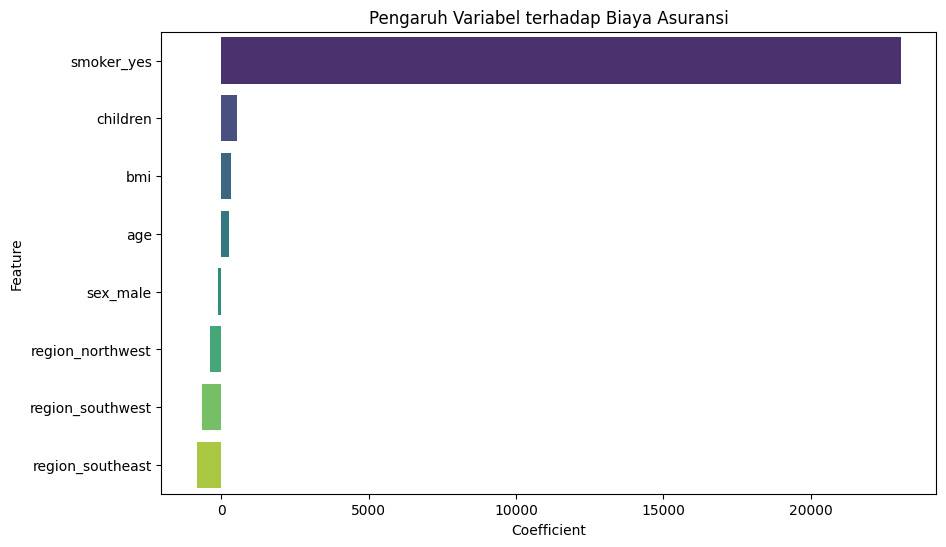

In [25]:
# Visualisasi koefisien
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients.sort_values('Coefficient', ascending=False),
    palette='viridis'
)
plt.title('Pengaruh Variabel terhadap Biaya Asuransi')
plt.show()